In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("D:\\Data_Science\\Datasets\\Kaggle_data\\Netflix_2021 Movie title\\netflix_titles_2021.csv")

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
# lets check the dimension of the datsets

print(f'Number of rows are {df.shape[0]} and columns are {df.shape[1]}')

Number of rows are 8807 and columns are 12


In [5]:
# Explore more about basic information of the datsets
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
# check the missing values from the datsets
column_null_value = df.isnull().sum()
print(column_null_value)

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [7]:
# check from how many countries the entries have been recieved 
a = df['country'].nunique()
print(f'TV, movies & shows cames from "{a}" countries')


TV, movies & shows cames from "748" countries


In [8]:
# check the show types
df['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [9]:
# check the number of shows and movies 
val_for_types = df['type'].value_counts()
print(val_for_types)

Movie      6131
TV Show    2676
Name: type, dtype: int64


In [10]:
# Lets evalute duration column values:
df['duration'].value_counts()

1 Season     1793
2 Seasons     425
3 Seasons     199
90 min        152
93 min        146
             ... 
9 min           1
18 min          1
3 min           1
16 min          1
312 min         1
Name: duration, Length: 220, dtype: int64

In [11]:
# Function to extract movie duration in minutes from duration column:

def get_minutes(duration):
    if isinstance (duration,str) and 'min' in duration:
        return int(duration.replace('min', '').strip())
    return None

# Function to extract number of seasons from duration column:

def get_season(duration):
    if isinstance (duration,str) and ('Season' in duration or "Seasons" in duration):
        return int(duration.split()[0])
    return None

In [12]:
# apply function to datasets 
df['duration_min'] = df['duration'].apply(get_minutes)
df['seasons_col'] = df['duration'].apply(get_season)

In [13]:
# drop the unnecessory column

df.drop('duration', axis = 1, inplace = True)

#show the data again

df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,listed_in,description,duration_min,seasons_col
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,Documentaries,"As her father nears the end of his life, filmm...",90.0,NaN
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",NaN,2.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,NaN,1.0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",NaN,1.0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,NaN,2.0


In [14]:
# check the correlation between the variables

# lets convert rating column

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['le_rating'] = le.fit_transform(df['rating'])

In [15]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,listed_in,description,duration_min,seasons_col,le_rating
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,Documentaries,"As her father nears the end of his life, filmm...",90.0,NaN,7
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",NaN,2.0,11
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,NaN,1.0,11
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",NaN,1.0,11
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,NaN,2.0,11


We can see that rating has been changed from mixed data fromat to integer format

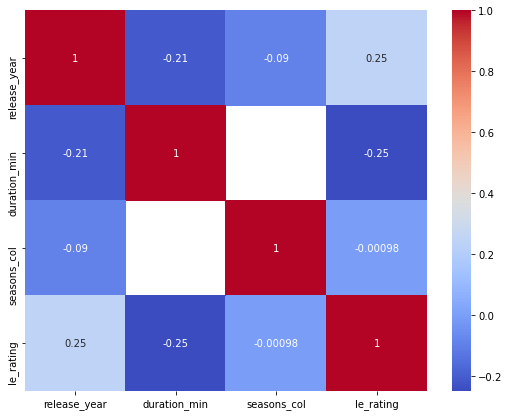

In [16]:
# lets check the correlation matrix for the datastes

# first group the numerical datsets separately 

numeric_feature = ['release_year','duration_min','seasons_col','le_rating']

correaltion_matrix = df[numeric_feature].corr()

plt.figure(figsize=(9,7))
sns.heatmap(correaltion_matrix, annot = True, cmap='coolwarm')
plt.show()

In [17]:
# which types most played
a = df['type'].iloc[0]
b = len(df[df['type']=='Movie']) 
print(f'Most shows played on netflix are "{a}" for "{b}" times')

Most shows played on netflix are "Movie" for "6131" times


In [18]:
#Which has the highest rating: TV shows or movies?

# first check the ranges of ratings from newly added column
df['le_rating'].unique()

array([ 7, 11,  6,  9, 12, 13, 14,  8, 10,  3,  4,  1,  2,  0,  5, 17, 15,
       16])

In [19]:
avg_rating = df.groupby('type')['le_rating'].mean()
high_avg_rating = avg_rating.idxmax()
print(f'Highest rating for the : "{high_avg_rating}"')

Highest rating for the : "TV Show"


In [20]:
# How many movies were made per year?
movie_per_year = df.groupby('release_year')['show_id'].count()
print(movie_per_year)

release_year
1925       1
1942       2
1943       3
1944       3
1945       4
        ... 
2017    1032
2018    1147
2019    1030
2020     953
2021     592
Name: show_id, Length: 74, dtype: int64


In [21]:
# check the maximum movie released in which year
movie_per_year.idxmax()

2018

In [22]:
# What is the show ID and director for 'House of Cards'?
show_id = df[(df['title'] == 'House of Cards')]['show_id'].iloc[0]
card_direct = df[(df['title'] == 'House of Cards')]['director'].iloc[0]
print(show_id,card_direct)

s1060 nan


In [23]:
# Who are the cast of the "Kota Factory" and country?
cast_kota = df[(df['title'] == 'Kota Factory')]['cast'].iloc[0]
country_kota = df[(df['title'] == 'Kota Factory')]['country'].iloc[0]
print(cast_kota)
('\n')
print(country_kota)

Mayur More, Jitendra Kumar, Ranjan Raj, Alam Khan, Ahsaas Channa, Revathi Pillai, Urvi Singh, Arun Kumar
India


In [24]:
#List all movies released in 2000.

twentith_cent_movie = df[df['release_year'] == 2000]
print(f'shape of this data set {twentith_cent_movie.shape}')
print("---------------------------------------------------------")
for movie in twentith_cent_movie['title']:
    print(movie)

shape of this data set (37, 14)
---------------------------------------------------------
The Nutty Professor II: The Klumps
Space Cowboys
The Original Kings of Comedy
Charlie's Angels
Snow Day
Battlefield Earth
The Whole Nine Yards
Moesha
Rugrats in Paris: The Movie
Monty Python: Before the Flying Circus
Fiza
Phir Bhi Dil Hai Hindustani
Pokémon: Indigo League
Star Trek: Voyager
Joseph: King of Dreams
28 Days
American Psycho
An American Tail: The Treasures of Manhattan Island
Billy Elliot
Center Stage
Chal Mere Bhai
Crouching Tiger, Hidden Dragon
Dragonheart: A New Beginning
Final Destination
Hamara Dil Aapke Paas Hai
How the Grinch Stole Christmas
Kya Kehna
Little Nicky
Papa the Great
Power Rangers Lightspeed Rescue
Pukar
Scary Movie
Scream 3
The Art of War
The Flintstones in Viva Rock Vegas
What Lies Beneath
Where the Money Is


In [71]:
# movies/shows in which Jitendra Kumar has performed
jitu_shows = df[df['cast'].str.contains ('Jitendra Kumar', na = False)]
jitu_shows.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,listed_in,description,duration_min,seasons_col,le_rating
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,NaN,2.0,11
2353,s2354,Movie,Chaman Bahaar,Apurva Dhar Badgaiyann,"Jitendra Kumar, Ritika Badiani, Yogendra Tikku...",India,"June 19, 2020",2020,TV-MA,"Comedies, Dramas, International Movies",A local shop becomes a hub for young men taken...,112.0,NaN,11


In [33]:
# what is best month for releasing a content 

avg_ratings=df.groupby("date_added")['le_rating'].mean()
avg_ratings.sort_values(ascending=False)
best_month= avg_ratings.idxmax()
print(f"The best_month for releasing content is : {best_month}")

The best_month for releasing content is : January 26, 2017


In [39]:
#Which genres are most watched on Netflix?

val_generes = df['listed_in'].value_counts()
print(f"Most watched genere is : '{val_generes.idxmax()}'")

Most watched genere is : 'Dramas, International Movies'


In [43]:
# How many movies have been released over the years?

total_movie = df['title'].value_counts().sum()
print(f'Total movies released so far {total_movie}')

Total movies released so far 8807


In [48]:
#How many movies were made per year?

movie_per_year = df.groupby('release_year')['show_id'].count()
print(movie_per_year)

release_year
1925       1
1942       2
1943       3
1944       3
1945       4
        ... 
2017    1032
2018    1147
2019    1030
2020     953
2021     592
Name: show_id, Length: 74, dtype: int64


In [55]:
#Show only the titles of TV shows released in South Africa.
titles_india = df[(df['type'] == 'TV Show') & (df['country'] == 'India')]
for tv_shows in titles_india['title']:
    print(tv_shows)

Kota Factory
Chhota Bheem
Dharmakshetra
Raja Rasoi Aur Anya Kahaniyan
Stories by Rabindranath Tagore
The Creative Indians
Navarasa
Alma Matters
Sab Jholmaal Hai
Lava Ka Dhaava
The Big Day
Bombay Begums
Zindagi in Short
Pitta Kathalu
Mighty Little Bheem: Kite Festival
Regiment Diaries
Paava Kadhaigal
Bhaag Beanie Bhaag
Fabulous Lives of Bollywood Wives
Mismatched
Bad Boy Billionaires: India
Masaba Masaba
Little Singham
Betaal
ChuChu TV Nursery Rhymes & Kids Songs (Hindi)
Hasmukh
Akbar Birbal
Ladies Up
She
Mighty Little Bheem: Festival of Colors
Taj Mahal 1989
Jamtara - Sabka Number Ayega
Little Things
Mighty Little Bheem: Diwali
College Romance
Engineering Girls
Girls Hostel
Inmates
Bard of Blood
Typewriter
Leila
Delhi Crime
Cricket Fever: Mumbai Indians
Selection Day
GHOUL
21 Sarfarosh: Saragarhi 1897
7 (Seven)
Agent Raghav
Anjaan: Rural Myths
Anjaan: Special Crimes Unit
Badalte Rishton Ki Dastaan
Bh Se Bhade
Bhaage Re Mann
Classic Legends
Darr Sabko Lagta Hai
Devlok with Devdutt Patta

In [56]:
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,listed_in,description,duration_min,seasons_col,le_rating
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,Documentaries,"As her father nears the end of his life, filmm...",90.0,NaN,7
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",NaN,2.0,11
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,NaN,1.0,11


In [58]:
#Show only the titles of TV shows released in south africa but more than 2 season
titles_africa = df[(df['type'] == 'TV Show') & (df['country'] == 'South Africa') & (df['seasons_col'] >= 2)]
for tv_shows in titles_africa['title']:
    print(tv_shows)

Blood & Water
Tjovitjo


In [64]:
# show indian movie with more than 120 minutea duration from 2012
long_ind_movie = df[(df['country'] == "India") & (df['type'] == "Movie") & (df['duration_min'] >=120) & (df['release_year'] == 2012)]
for movie in long_ind_movie['title']:
    print(movie)


Kyaa Super Kool Hain Hum
Department
Ferrari Ki Sawaari
Aiyyaa
Oh My God
Players
Talaash
Kahaani
Barfi!
Grandmaster
Heroine
Husbands in Goa
Kalakalappu
Luv Shuv Tey Chicken Khurana
Mugamoodi
Thaandavam
Vettai
Rowdy Rathore
Tere Naal Love Ho Gaya
Celluloid Man
Satrangi Re
Tukaram


In [65]:
#Identify the top 10 directors who have contributed the most TV shows and movies to Netflix
top_director = df['director'].value_counts()
top_director.head(10)

Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Suhas Kadav               16
Jay Karas                 14
Cathy Garcia-Molina       13
Jay Chapman               12
Youssef Chahine           12
Martin Scorsese           12
Steven Spielberg          11
Name: director, dtype: int64

In [68]:
#How many movies/TV shows has Tom Cruise been cast in?

tom_count = df[df['cast'].str.contains ("Tom Cruise", na = False)]
len(tom_count)

2

In [70]:
# movies/shows in which Jitendra Kumar has performed
jitu_shows = df[df['cast'].str.contains ('Jitendra Kumar', na = False)]
jitu_shows.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,listed_in,description,duration_min,seasons_col,le_rating
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,NaN,2.0,11
2353,s2354,Movie,Chaman Bahaar,Apurva Dhar Badgaiyann,"Jitendra Kumar, Ritika Badiani, Yogendra Tikku...",India,"June 19, 2020",2020,TV-MA,"Comedies, Dramas, International Movies",A local shop becomes a hub for young men taken...,112.0,NaN,11


In [72]:
#How many movies have a "TV-14" rating in Canada?
can14_moview = df[(df['country'] == 'Canada') & (df['type'] == 'Movie') & (df['rating'] == "TV-14")]
len(can14_moview)

13

In [75]:
# show the above movie name
for movie in can14_moview['title']:
    print (movie)

Level 16
Made You Look: A True Story About Fake Art
There's Something in the Water
Martin Matte: La vie, la mort...eh la la..!
#cats_the_mewvie
#Roxy
At First Light
Counterfeiting in Suburbia
Long Time Running
Sadie's Last Days on Earth
Sardaar ji
The Accountant of Auschwitz
The Wrong Babysitter


In [78]:
# get the count and rating into a dataframe
rating_count_ser = df.groupby('rating')['duration_min'].count()
rating_count_df = rating_count_ser.to_frame().reset_index()
rating_count_df.columns=['rating', 'duration_count']
rating_count_df

,rating,duration_count
0,66 min,0
1,74 min,0
2,84 min,0
3,G,41
4,NC-17,3
5,NR,75
6,PG,287
7,PG-13,490
8,R,797
9,TV-14,1427


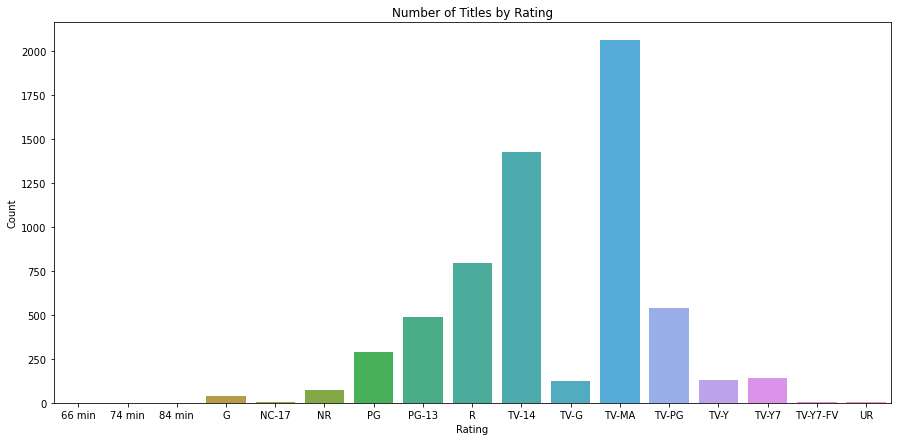

In [82]:
#visualise the above data
plt.figure(figsize=(15, 7))
sns.barplot(data=rating_count_df, x='rating', y='duration_count')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Number of Titles by Rating');